In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

%matplotlib inline

In [3]:
def plot_svc(svc, x, y, h=0.02, pad=0.25):
    x_min, x_max = x[:, 0].min()-pad, x[:, 0].max()+pad
    y_min, y_max = x[:, 1].min()-pad, x[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contour(xx, yy, z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(x[:, 0], x[:, 1], s=70, c=y, cmap=mpl.cm.Paired)
    sv=svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of Support Vectors:', svc.support_.size)

In [6]:
np.random.seed(5)
x = np.random.randn(20, 2)
y = np.repeat([1,-1], 10)
x[y == -1] = x[y == -1]+1

array([[ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-1.19276461, -0.20487651],
       [-0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751],
       [ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.99643983,  1.71242127],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 1.19766009,  2.33484857],
       [ 0.91312439,  2.56153229]])

/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


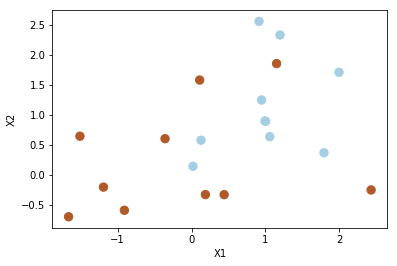

In [19]:
f = plt.figure(1)
plt.scatter(x[:,0], x[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
f.show()

In [20]:
svc = SVC(C=1, kernel='linear')
svc.fit(x, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

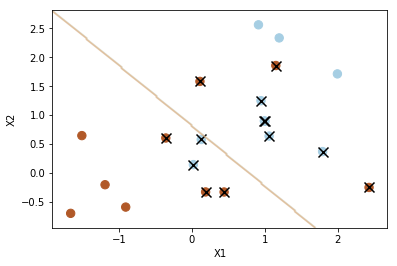

Number of Support Vectors: 13


In [21]:
g = plt.figure(2)
plot_svc(svc, x, y)

In [22]:
id = svc.support_
id

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

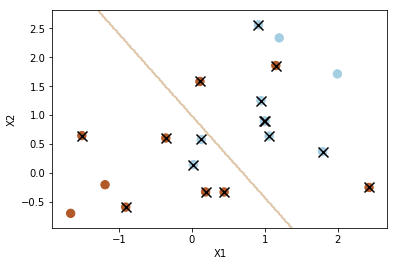

Number of Support Vectors: 16


In [24]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(x, y)
h = plt.figure(3)
plot_svc(svc2, x, y)

In [25]:
from sklearn.grid_search import GridSearchCV

/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
tuned_parameters = [{'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}]

clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(x, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [32]:
gs = clf.grid_scores_
gs

[mean: 0.80000, std: 0.24495, params: {'C': 0.001},
 mean: 0.80000, std: 0.24495, params: {'C': 0.01},
 mean: 0.80000, std: 0.24495, params: {'C': 0.1},
 mean: 0.75000, std: 0.33541, params: {'C': 1},
 mean: 0.75000, std: 0.33541, params: {'C': 5},
 mean: 0.75000, std: 0.33541, params: {'C': 10},
 mean: 0.75000, std: 0.33541, params: {'C': 100}]

In [33]:
bp = clf.best_params_
bp

{'C': 0.001}

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
np.random.seed(8)
x = np.random.randn(200,2)
x[:100] = x[:100] +2
x[101:150] = x[101:150]-2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=2)

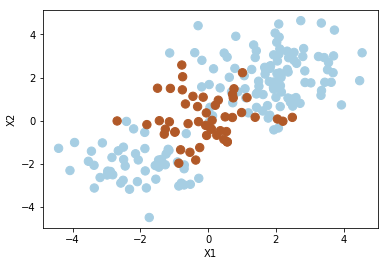

In [37]:
f = plt.figure(1)
plt.scatter(x[:,0], x[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

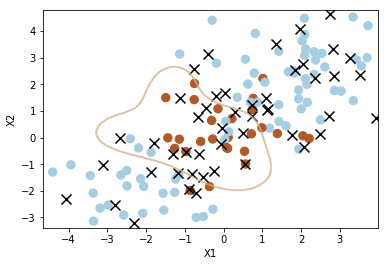

Number of Support Vectors: 51


In [39]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(x_train, y_train)

g = plt.figure(2)
plot_svc(svm, x_test, y_test)

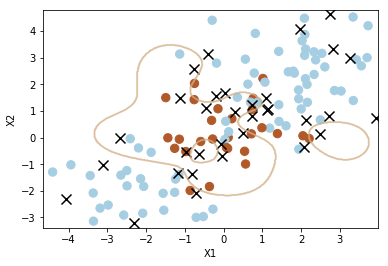

Number of Support Vectors: 36


In [40]:
svm2 = SVC(C=100, kernel='rbf', gamma=1)
svm2.fit(x_train, y_train)

g = plt.figure(2)
plot_svc(svm2, x_test, y_test)

In [41]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1, 2, 3, 4]}]

In [42]:
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(x_train, y_train)
bp = clf.best_params_

In [43]:
bp

{'C': 1, 'gamma': 0.5}

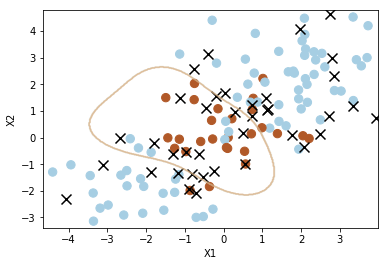

Number of Support Vectors: 41


In [44]:
i = plt.figure(4)
plot_svc(clf.best_estimator_, x_test, y_test)

In [45]:
print(confusion_matrix(y_test, clf.best_estimator_.predict(x_test)))
print(clf.best_estimator_.score(x_test, y_test))

[[67  6]
 [ 9 18]]
0.85


In [58]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(x_train, y_train)

In [59]:
y_train_score3 = svm3.decision_function(x_train)
y_train_score4 = svm4.decision_function(x_train)

In [66]:
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

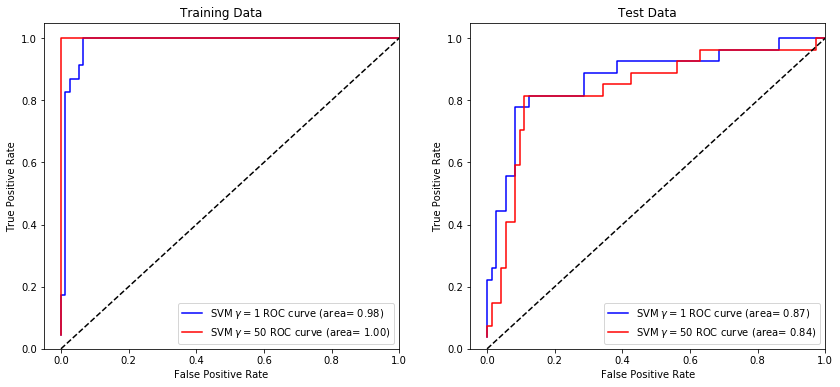

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area= %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area= %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(x_test)
y_test_score4 = svm4.decision_function(x_test)

false2_pos_rate3, true2_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc2_auc3 = auc(false2_pos_rate3, true2_pos_rate3)

false2_pos_rate4, true2_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc2_auc4 = auc(false2_pos_rate4, true2_pos_rate4)

ax2.plot(false2_pos_rate3, true2_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area= %0.2f)' % roc2_auc3, color='b')
ax2.plot(false2_pos_rate4, true2_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area= %0.2f)' % roc2_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0,1], [0,1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")